Library Installation

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import numpy as np

In [ ]:
# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data loading

In [ ]:
# Load your dataset
df = pd.read_csv('/content/amazon_reviews.csv')

Data description

In [ ]:
# Display the shape of the dataset
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(4915, 12)


In [ ]:
# Display the first few rows of the dataset
print("Data Head:")
print(df.head())

Data Head:
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0     

In [ ]:
# Display a summary of the dataset
print("\nData Summary:")
print(df.describe(include='all'))


Data Summary:
         Unnamed: 0     reviewerName      overall  reviewText  reviewTime  \
count   4915.000000             4914  4915.000000        4914        4915   
unique          NaN             4594          NaN        4912         690   
top             NaN  Amazon Customer          NaN  No issues.  2013-12-30   
freq            NaN              121          NaN           2          26   
mean    2457.000000              NaN     4.587589         NaN         NaN   
std     1418.982617              NaN     0.996845         NaN         NaN   
min        0.000000              NaN     1.000000         NaN         NaN   
25%     1228.500000              NaN     5.000000         NaN         NaN   
50%     2457.000000              NaN     5.000000         NaN         NaN   
75%     3685.500000              NaN     5.000000         NaN         NaN   
max     4914.000000              NaN     5.000000         NaN         NaN   

           day_diff  helpful_yes   helpful_no   total_vote  

Data cleaning

In [ ]:
# Check for null values in the dataset
print("\nNull Value Check:")
print(df.isnull().sum())


Null Value Check:
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [ ]:
# Replace null values with the mean
df.fillna(df.mean(), inplace=True)

<ipython-input-9-10c739c5e089>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Drop rows with missing values in 'reviewText' and 'overall'
df = df.dropna(subset=['reviewText', 'overall'])

Description of sentiment lebels

In [ ]:
# Convert star ratings to sentiment labels (positive, neutral, negative)
df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x > 2 else 'negative' if x < 2 else 'neutral')

Exploratory data analysis

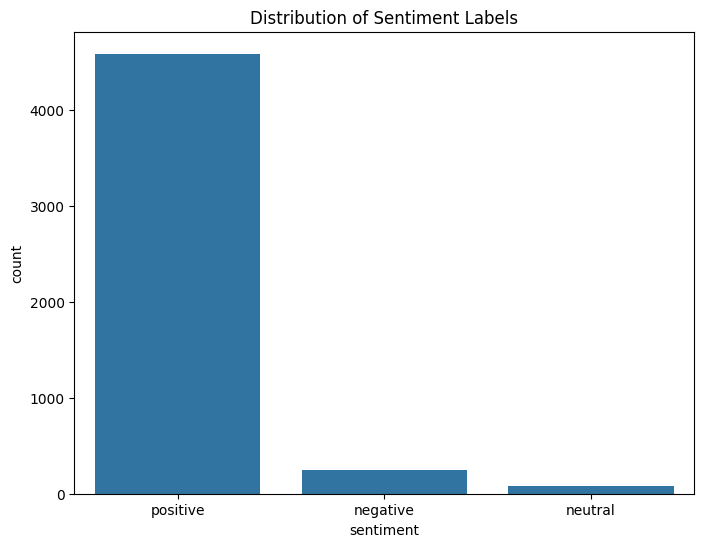

In [ ]:
# Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()

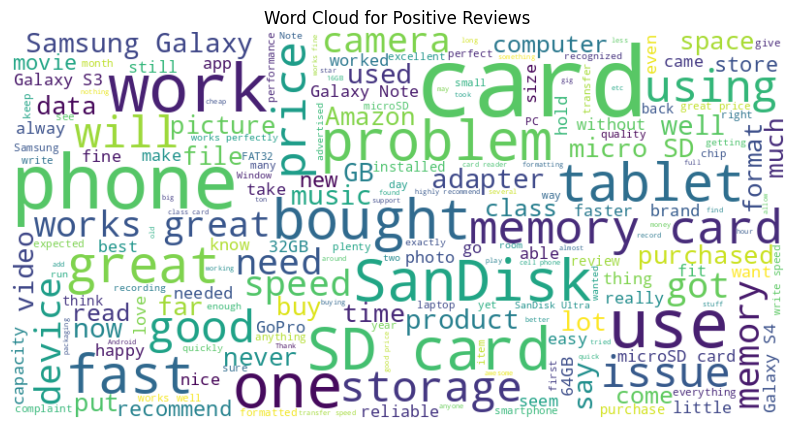

In [ ]:
#Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['reviewText'])
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

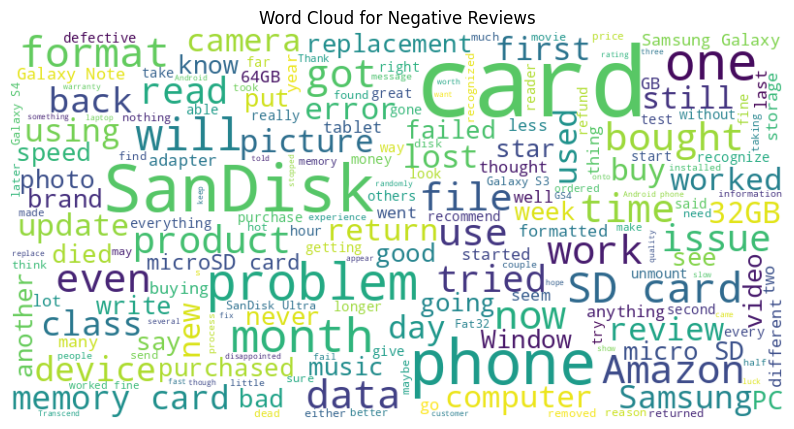

In [ ]:
#Word Cloud for Negative Reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['reviewText'])
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

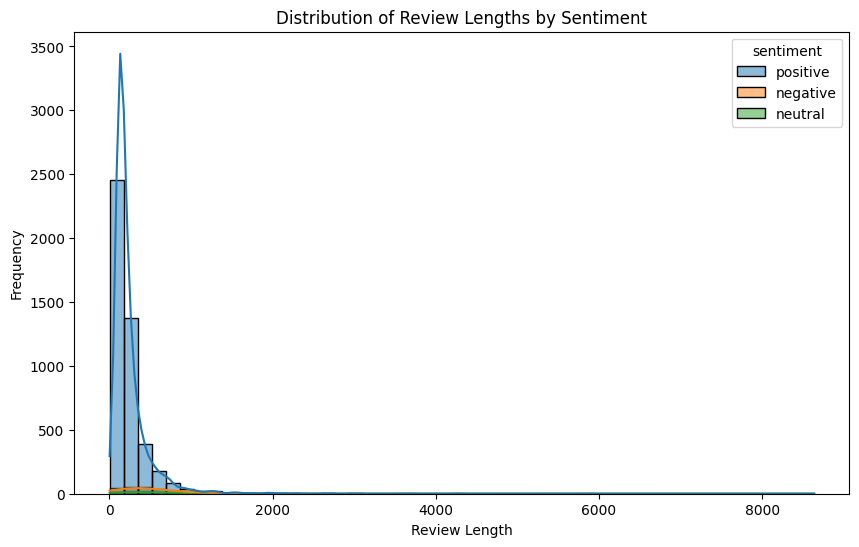

In [ ]:
# Distribution of Review Lengths
df['review_length'] = df['reviewText'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-b8f174c8d391>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_sentiment.index, y=avg_rating_by_sentiment.values, palette='viridis')


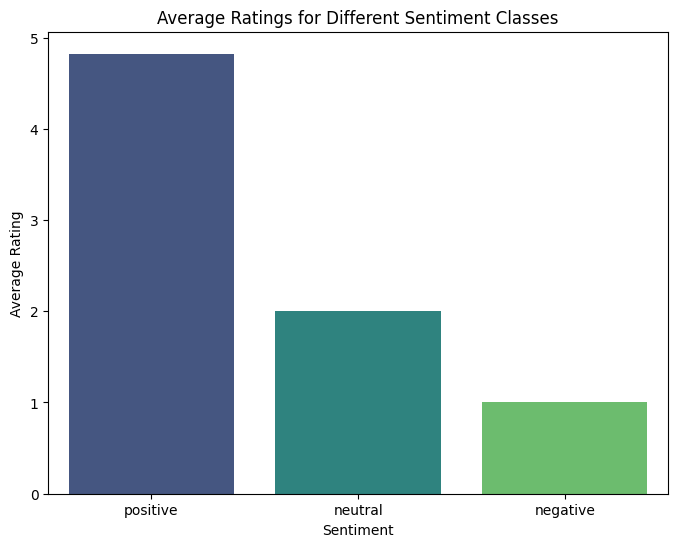

In [ ]:
# Average Ratings for Different Sentiment Classes
avg_rating_by_sentiment = df.groupby('sentiment')['overall'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_sentiment.index, y=avg_rating_by_sentiment.values, palette='viridis')
plt.title('Average Ratings for Different Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-17-a6649f74e27a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')


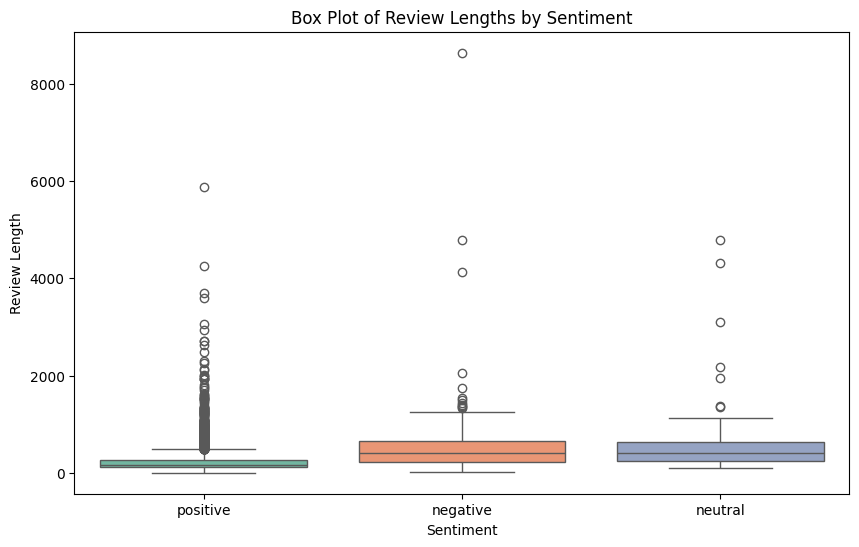

In [ ]:
# Box Plot of Review Lengths by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')
plt.title('Box Plot of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

<ipython-input-18-cbbbe7cb000f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='overall', data=df, palette='coolwarm')


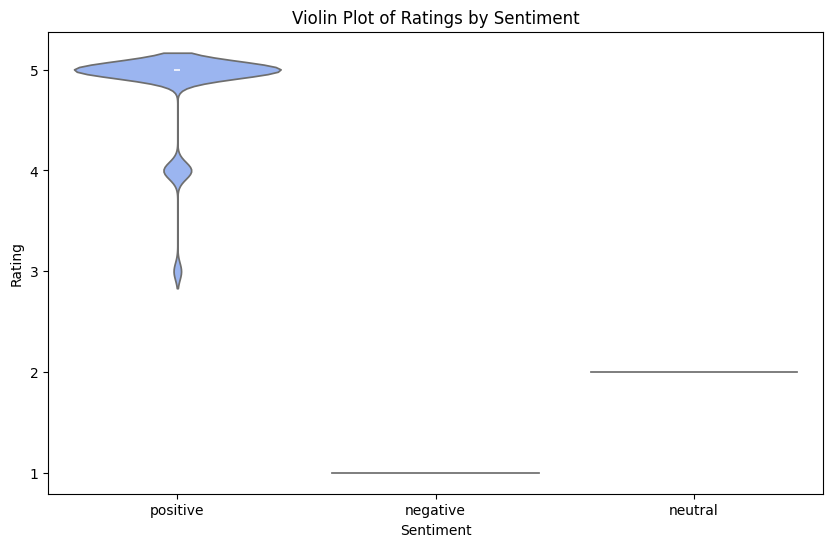

In [ ]:
# Violin Plot of Ratings by Sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='overall', data=df, palette='coolwarm')
plt.title('Violin Plot of Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

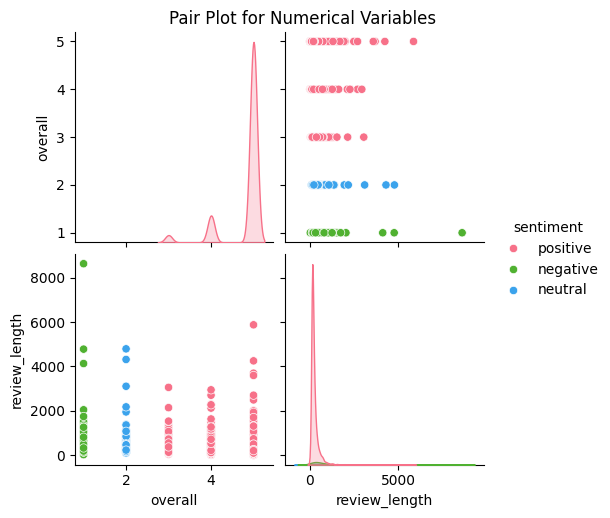

In [ ]:
# Pair Plot for Numerical Variables
num_vars = ['overall', 'review_length']
sns.pairplot(df[num_vars + ['sentiment']], hue='sentiment', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

Data spliting

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['sentiment'], test_size=0.2, random_state=42)

Model development

In [ ]:
# Text preprocessing and machine learning pipeline
model = make_pipeline(
    TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000, tokenizer=PorterStemmer().stem),
    MultinomialNB()
)

In [ ]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method PorterStemmer.stem of <PorterStemmer>>)),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_NB = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_NB * 100:.2f}%')

Accuracy: 94.30%


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        44
     neutral       0.00      0.00      0.00        12
    positive       0.94      1.00      0.97       927

    accuracy                           0.94       983
   macro avg       0.31      0.33      0.32       983
weighted avg       0.89      0.94      0.92       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create a pipeline with CountVectorizer and Logistic Regression
logreg_model = make_pipeline(
    CountVectorizer(stop_words=stopwords.words('english')),
    LogisticRegression(random_state=42)
)

In [ ]:
# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Model Accuracy: {accuracy_logreg * 100:.2f}%')

Logistic Regression Model Accuracy: 95.22%


In [ ]:
# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.69      0.41      0.51        44
     neutral       0.00      0.00      0.00        12
    positive       0.97      0.99      0.98       927

    accuracy                           0.95       983
   macro avg       0.55      0.47      0.50       983
weighted avg       0.95      0.95      0.95       983



Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a pipeline with TfidfVectorizer and Support Vector Machine
svm_model = make_pipeline(
    TfidfVectorizer(stop_words=stopwords.words('english')),
    SVC(random_state=42)
)

In [ ]:
# Train the SVM model
svm_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('svc', SVC(random_state=42))])

In [ ]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm * 100:.2f}%')

SVM Model Accuracy: 94.40%


In [ ]:
# Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

    negative       1.00      0.02      0.04        44
     neutral       0.00      0.00      0.00        12
    positive       0.94      1.00      0.97       927

    accuracy                           0.94       983
   macro avg       0.65      0.34      0.34       983
weighted avg       0.93      0.94      0.92       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model comparison

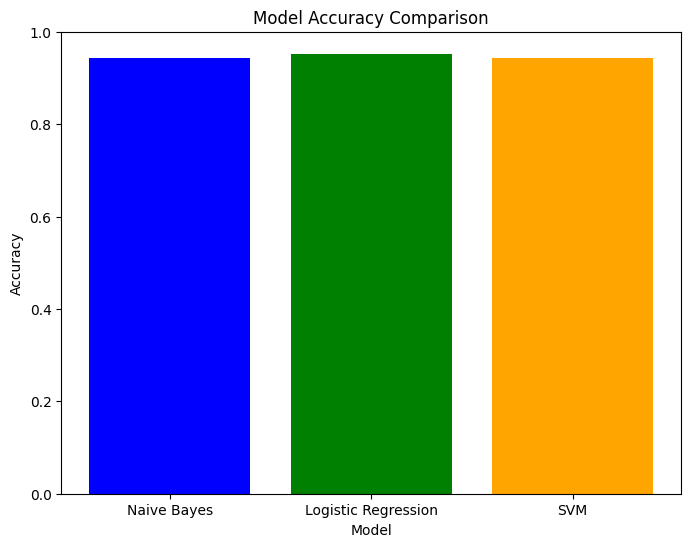

In [ ]:
# Model names and their accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [accuracy_NB, accuracy_logreg, accuracy_svm]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit to 0-100%
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()